<a href="https://colab.research.google.com/github/Maagnitude/california-housing-xai/blob/main/california-housing-xai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

In [2]:
# Load dataset (X:inputs/features, Y:target)
ds_X, ds_Y = fetch_california_housing(return_X_y=True)

In [3]:
# Split features into training/test sets
ds_X_train = ds_X[:-4000]
ds_X_test = ds_X[-4000:]

In [4]:
# Split targets into training/test sets
ds_Y_train = ds_Y[:-4000]
ds_Y_test = ds_Y[-4000:]

In [5]:
# Initialize linear regression object
regr = linear_model.LinearRegression()

In [6]:
# Construct model using the training sets
regr.fit(ds_X_train, ds_Y_train)

LinearRegression()

In [7]:
# Produce predictions using the test set
ds_Y_pred = regr.predict(ds_X_test)

In [8]:
# Output learned model coefficients
print("Intercept: \n", regr.intercept_)
print("Coefficients: \n", regr.coef_)

Intercept: 
 -36.308638344599295
Coefficients: 
 [ 4.47711234e-01  9.40915756e-03 -1.20802393e-01  7.09551707e-01
 -1.82577993e-06 -8.83342492e-03 -4.21683195e-01 -4.29077083e-01]


In [9]:
# Output mean squared prediction error
print("Mean square prediction error: %.2f" % mean_squared_error(ds_Y_test, ds_Y_pred))

Mean square prediction error: 0.50


Η μετρική R-squared είναι ένα μέτρο του πόσο καλά το μοντέλο εξηγεί τη διακύμανση των δεδομένων. Κυμαίνεται από 0 έως 1, με τιμή 1 που υποδηλώνει τέλεια προσαρμογή. Μια υψηλή τιμή R-squared δείχνει ότι το μοντέλο είναι σε θέση να εξηγήσει μεγάλο μέρος της διακύμανσης των δεδομένων, ενώ μια χαμηλή τιμή R-squared δείχνει ότι το μοντέλο δεν είναι σε θέση να εξηγήσει μεγάλο μέρος της διακύμανσης των δεδομένων.

Γενικά, η συνολική ικανότητα του μοντέλου να εξηγεί τα δεδομένα μπορεί να αξιολογηθεί εξετάζοντας την τιμή R-τετράγωνο σε συνδυασμό με το μέσο τετραγωνικό σφάλμα πρόβλεψης (MSE). Ένα χαμηλό MSE και μια υψηλή τιμή τετραγώνου R θα υποδείκνυε καλή προσαρμογή του μοντέλου, ενώ ένα υψηλό MSE και μια χαμηλή τιμή τετραγώνου R θα υποδείκνυε κακή προσαρμογή του μοντέλου.

In [10]:
from sklearn.metrics import r2_score

r2 = r2_score(ds_Y_test, ds_Y_pred)
print("R-squared:", r2)

R-squared: 0.6616437502497786


In [27]:
cal_housing=fetch_california_housing()
feature_names=cal_housing.feature_names

In [28]:
feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


<Figure size 288x144 with 0 Axes>

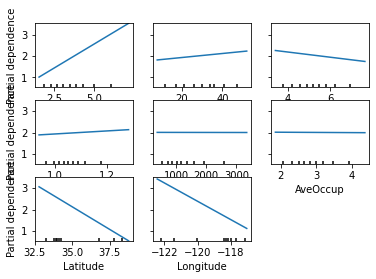

In [51]:
from sklearn.inspection import plot_partial_dependence

plt.figure(figsize=(4, 2))
# Plot the partial dependence for the selected features
plot_partial_dependence(regr, ds_X_train, range(ds_X.shape[1]),
                        feature_names=feature_names,
                        n_jobs=-1, grid_resolution=2)
plt.show()
